## Importing Libraries:

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Preparing Data:

In [3]:
data = pd.read_csv('Data/crypto_data_updated_13_november.csv')
data.head()

,Date,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
0,2017-11-13 00:00:00+00:00,6559.490234,6263249920,316.716003,1041889984,1.00935,767884032,1.68662,12238800
1,2017-11-14 00:00:00+00:00,6635.750000,3197110016,337.631012,1069680000,1.00683,429857984,1.59258,7829600
2,2017-11-15 00:00:00+00:00,7315.540039,4200880128,333.356995,722665984,1.00318,449671008,1.53045,7615500
3,2017-11-16 00:00:00+00:00,7871.689941,5123809792,330.924011,797254016,1.00212,650278976,1.57792,8928640
4,2017-11-17 00:00:00+00:00,7708.990234,4651670016,332.394012,621732992,1.00139,639398016,1.51036,8508840


In [4]:
data['Date'] = data['Date'].astype('datetime64[ns]')

In [5]:
original = data.iloc[-1, :]
data = data.iloc[:-1,:]

In [6]:
original

Date             2022-11-13 00:00:00
Close (BTC)             16550.126953
Volume (BTC)             25153593344
Close (ETH)              1228.583984
Volume (ETH)              9734809600
Close (USDT)                 0.99895
Volume (USDT)            36130271232
Close (BNB)               279.073547
Volume (BNB)               904519232
Name: 1826, dtype: object

## Exploratory data analysis:

statistical analysis:

In [7]:
data.shape

(1826, 9)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1826 non-null   datetime64[ns]
 1   Close (BTC)    1826 non-null   float64       
 2   Volume (BTC)   1826 non-null   int64         
 3   Close (ETH)    1826 non-null   float64       
 4   Volume (ETH)   1826 non-null   int64         
 5   Close (USDT)   1826 non-null   float64       
 6   Volume (USDT)  1826 non-null   int64         
 7   Close (BNB)    1826 non-null   float64       
 8   Volume (BNB)   1826 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(4)
memory usage: 128.5 KB


In [9]:
data.describe()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
count,1826.000000,1.826000e+03,1826.000000,1.826000e+03,1826.000000,1.826000e+03,1826.000000,1.826000e+03
mean,20230.329711,2.630335e+10,1129.175472,1.309069e+10,1.001608,4.156306e+10,143.812134,9.718079e+08
std,17032.901546,1.996061e+10,1204.327280,1.087147e+10,0.005772,3.844013e+10,184.190314,1.453360e+09
min,3236.761719,2.923670e+09,84.308296,6.217330e+08,0.966644,4.298580e+08,1.510360,9.284000e+03
25%,7660.045044,1.082527e+10,208.920326,4.492992e+09,0.999989,6.000109e+09,14.112714,1.360359e+08
50%,10788.915527,2.396271e+10,474.768723,1.095693e+10,1.000508,3.645428e+10,23.780328,3.479015e+08
75%,33740.259766,3.566115e+10,1803.337372,1.836379e+10,1.002520,6.090722e+10,293.945900,1.410843e+09
max,67566.828125,3.509679e+11,4812.087402,8.448291e+10,1.077880,2.790675e+11,675.684082,1.798295e+10


In [10]:
data.isnull().sum()

Date             0
Close (BTC)      0
Volume (BTC)     0
Close (ETH)      0
Volume (ETH)     0
Close (USDT)     0
Volume (USDT)    0
Close (BNB)      0
Volume (BNB)     0
dtype: int64

In [11]:
data.corr()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Close (BTC),1.000000,0.557257,0.924302,0.663817,-0.149263,0.764384,0.901399,0.763839
Volume (BTC),0.557257,1.000000,0.379873,0.857096,-0.099783,0.868007,0.411994,0.598650
Close (ETH),0.924302,0.379873,1.000000,0.542423,-0.152118,0.625156,0.955736,0.649967
Volume (ETH),0.663817,0.857096,0.542423,1.000000,-0.120227,0.946828,0.565396,0.698022
Close (USDT),-0.149263,-0.099783,-0.152118,-0.120227,1.000000,-0.140879,-0.162480,-0.116347
Volume (USDT),0.764384,0.868007,0.625156,0.946828,-0.140879,1.000000,0.653503,0.773242
Close (BNB),0.901399,0.411994,0.955736,0.565396,-0.162480,0.653503,1.000000,0.718722
Volume (BNB),0.763839,0.598650,0.649967,0.698022,-0.116347,0.773242,0.718722,1.000000


In [12]:
data.cov()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Close (BTC),2.901197e+08,1.894604e+14,1.896038e+07,1.229208e+14,-1.467495e+01,5.004782e+14,2.827954e+06,1.890878e+13
Volume (BTC),1.894604e+14,3.984260e+20,9.131796e+12,1.859909e+20,-1.149645e+07,6.660121e+20,1.514719e+12,1.736680e+19
Close (ETH),1.896038e+07,9.131796e+12,1.450404e+06,7.101849e+12,-1.057447e+00,2.894127e+13,2.120066e+05,1.137651e+12
Volume (ETH),1.229208e+14,1.859909e+20,7.101849e+12,1.181890e+20,-7.544384e+06,3.956804e+20,1.132161e+12,1.102885e+19
Close (USDT),-1.467495e+01,-1.149645e+07,-1.057447e+00,-7.544384e+06,3.331732e-05,-3.125842e+07,-1.727434e-01,-9.760302e+05
Volume (USDT),5.004782e+14,6.660121e+20,2.894127e+13,3.956804e+20,-3.125842e+07,1.477644e+21,4.626996e+12,4.319898e+19
Close (BNB),2.827954e+06,1.514719e+12,2.120066e+05,1.132161e+12,-1.727434e-01,4.626996e+12,3.392607e+04,1.923983e+11
Volume (BNB),1.890878e+13,1.736680e+19,1.137651e+12,1.102885e+19,-9.760302e+05,4.319898e+19,1.923983e+11,2.112254e+18


Visual analysis:

<AxesSubplot:>

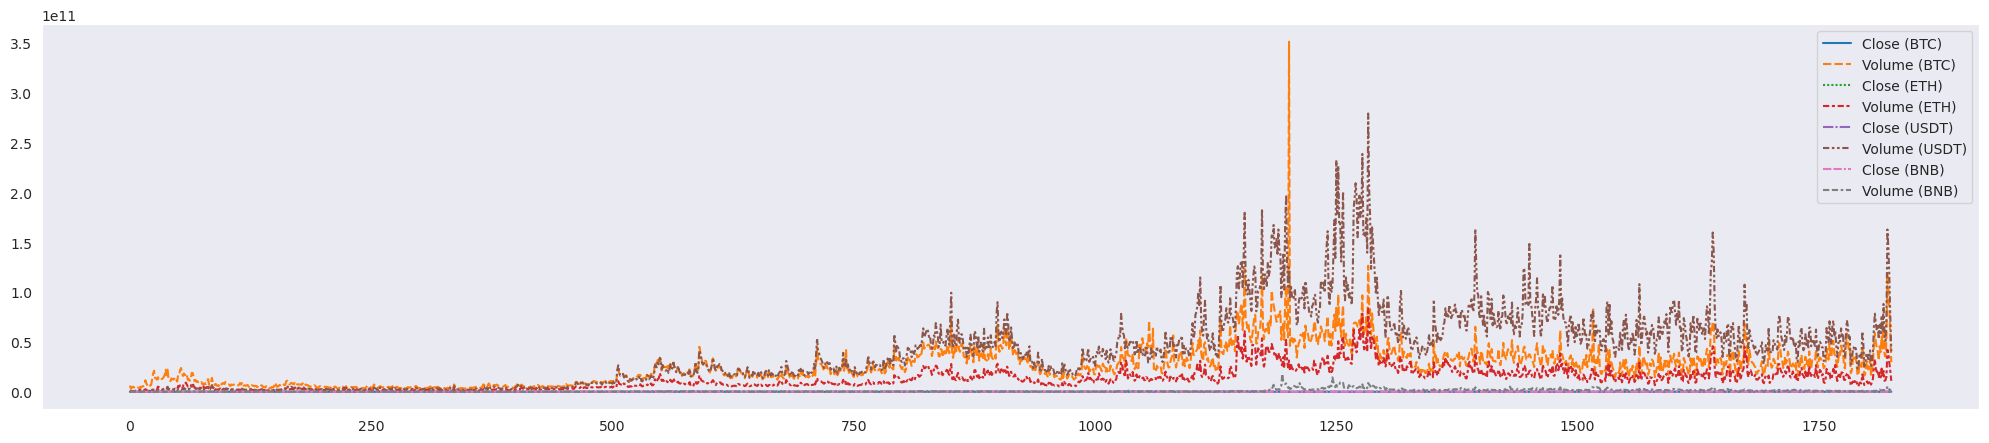

In [13]:
plt.figure(figsize = (25, 5))  # Setting  size of figure
sns.set_style('dark') # theme 
sns.lineplot(data=data) # Plot

Text(0.5, 1.0, 'Adjacent Close Price')

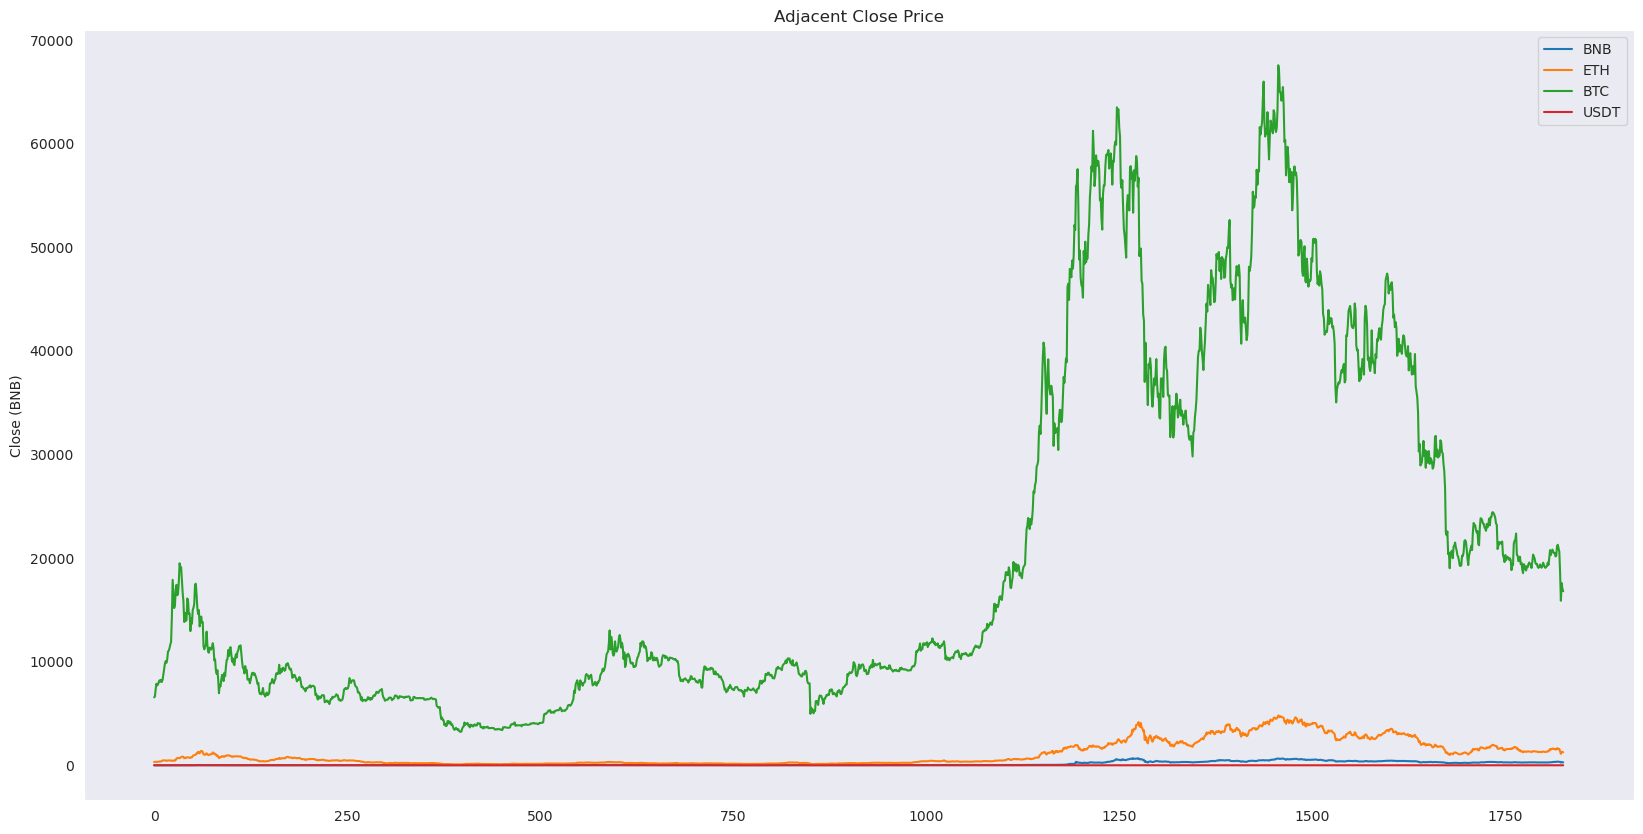

In [14]:
plt.figure(figsize = (20, 10))
sns.set_style('dark')
sns.lineplot(data = data['Close (BNB)'], label = 'BNB')
sns.lineplot(data = data['Close (ETH)'], label = 'ETH')
sns.lineplot(data = data['Close (BTC)'], label = 'BTC')
sns.lineplot(data = data['Close (USDT)'], label = 'USDT')
plt.title('Adjacent Close Price')

Text(0.5, 1.0, 'Volume')

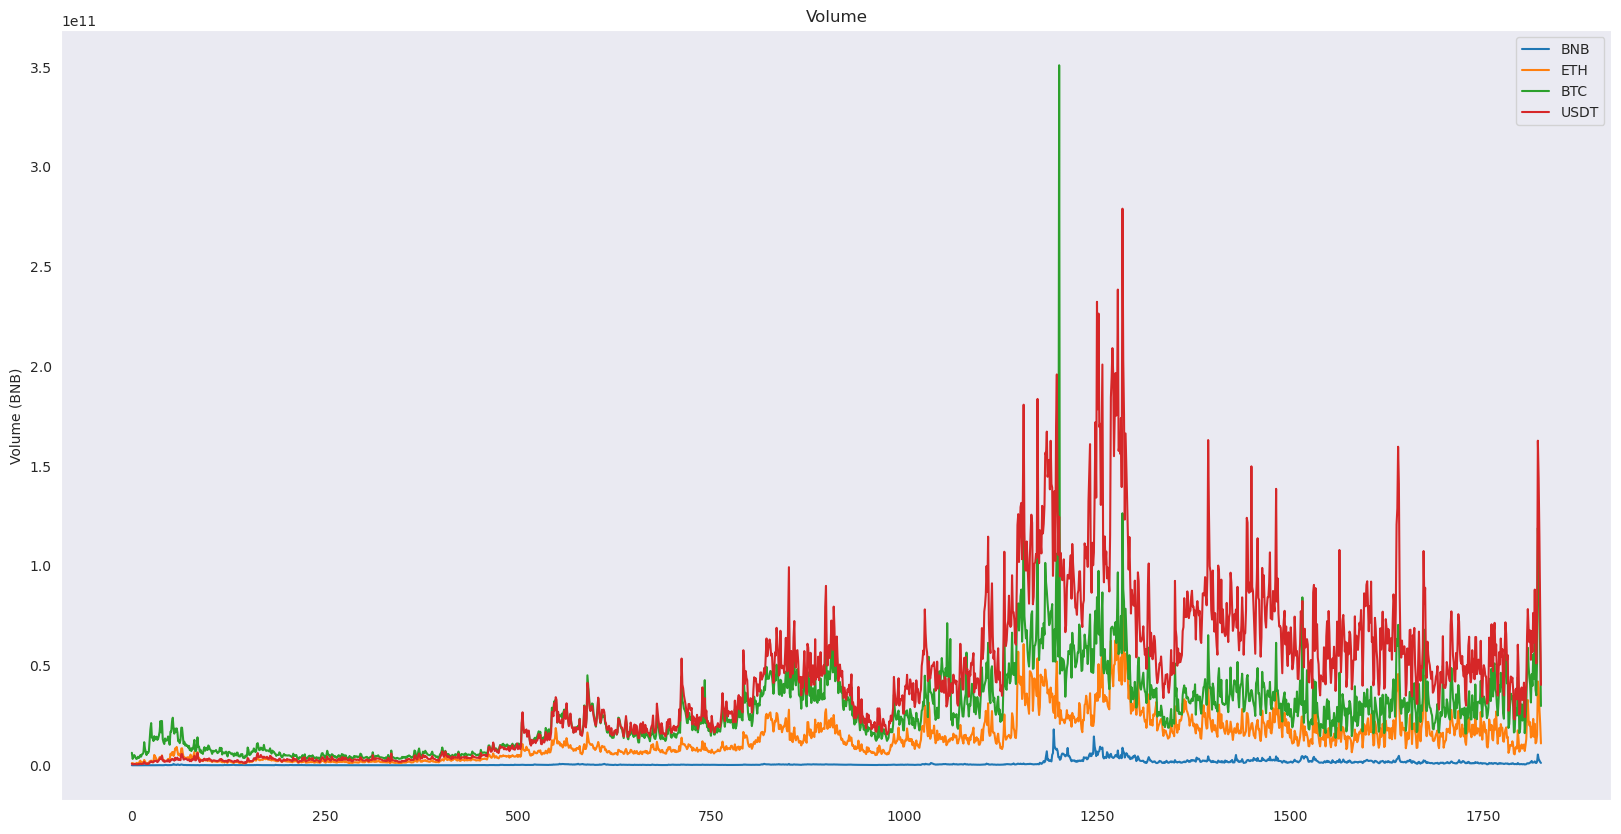

In [15]:
plt.figure(figsize = (20, 10))
sns.set_style('dark')
sns.lineplot(data = data['Volume (BNB)'], label = 'BNB')
sns.lineplot(data = data['Volume (ETH)'], label = 'ETH')
sns.lineplot(data = data['Volume (BTC)'], label = 'BTC')
sns.lineplot(data = data['Volume (USDT)'], label = 'USDT')
plt.title('Volume')

array([[<AxesSubplot:title={'center':'Close (BTC)'}>,
        <AxesSubplot:title={'center':'Volume (BTC)'}>,
        <AxesSubplot:title={'center':'Close (ETH)'}>,
        <AxesSubplot:title={'center':'Volume (ETH)'}>],
       [<AxesSubplot:title={'center':'Close (USDT)'}>,
        <AxesSubplot:title={'center':'Volume (USDT)'}>,
        <AxesSubplot:title={'center':'Close (BNB)'}>,
        <AxesSubplot:title={'center':'Volume (BNB)'}>]], dtype=object)

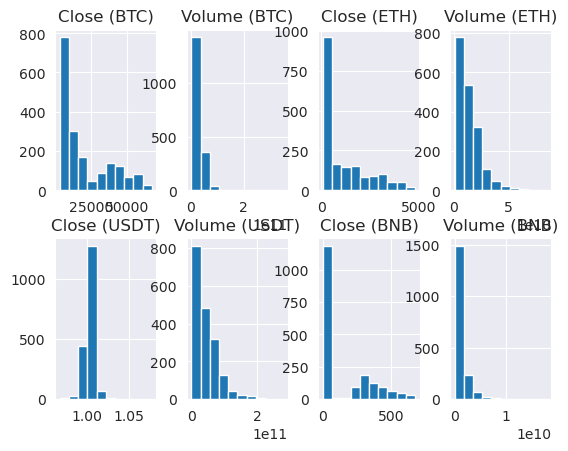

In [16]:
data1 = data.drop('Date',axis=1)
data1.hist( layout=(2, 4))

<AxesSubplot:>

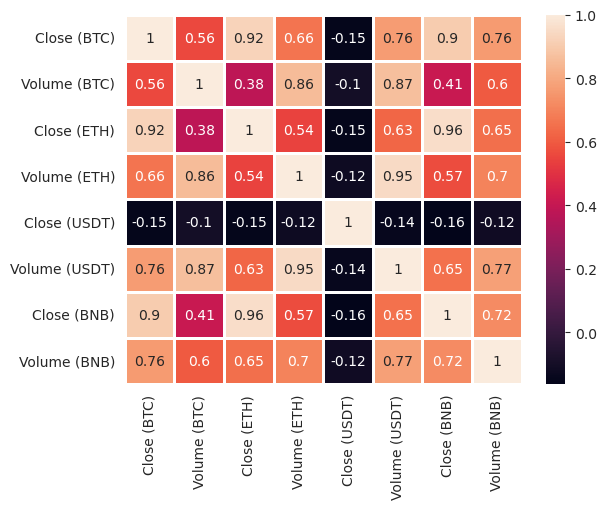

In [17]:
sns.heatmap(data.corr(),annot =True , linewidths=2)

## Data processing:

In [18]:
X = data.drop(columns = ['Close (BTC)','Date'], axis = 1)
Y = data.loc[:, 'Close (BTC)']

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
rf = RandomForestRegressor()
rf

RandomForestRegressor()

In [22]:
from sklearn.neighbors import KNeighborsRegressor

In [23]:
knn = KNeighborsRegressor()
knn

KNeighborsRegressor()

In [24]:
rf.fit(X_train , Y_train)
knn.fit(X_train , Y_train)

KNeighborsRegressor()

In [25]:
Y_pred_neigh = knn.predict(X_test)
r2knn = metrics.r2_score(Y_test, Y_pred_neigh)

Y_pred_rf = rf.predict(X_test)
r2rf = metrics.r2_score(Y_test, Y_pred_rf)

In [26]:
print("Accuracy of K nearest neighbors:", r2knn)

print("Accuracy of Random Forest:", r2rf)

Accuracy of K nearest neighbors: 0.9668030626509713
Accuracy of Random Forest: 0.9617955863172384


Here Random Forest algorithm is giving maximum accuracy